# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import math
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1333,0,28.0,35100.0,0,0
2699,0,40.0,39400.0,3,0
869,1,24.0,33100.0,1,0
3453,0,27.0,28500.0,0,0
2328,1,30.0,57200.0,1,0
1839,0,32.0,48500.0,1,0
4946,1,26.0,32600.0,2,0
3891,0,18.0,18900.0,1,0
2177,1,41.0,44700.0,1,0
1236,0,23.0,35000.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype(int)

In [8]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [10]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

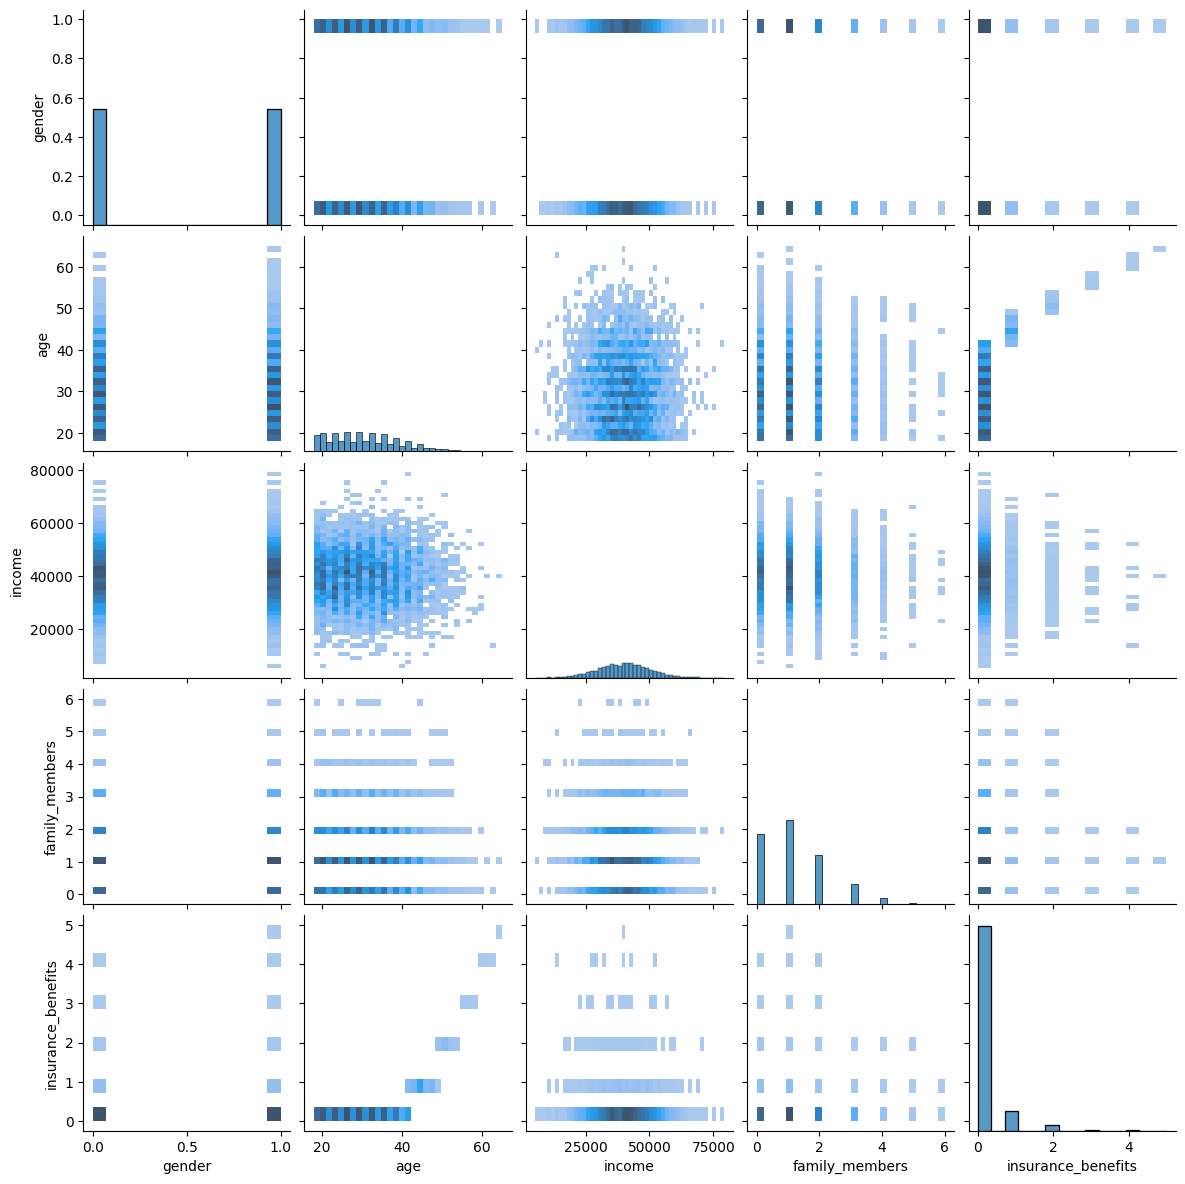

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :
    param n: número de objetos para los que se buscan los vecinos más cercanos    :
    param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names]) # <t
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\Home\AppData\Local\Temp\ipykernel_3868\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\Home\AppData\Local\Temp\ipykernel_3868\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3641,1,0.369231,0.546835,0.166667,0
3405,1,0.338462,0.569620,0.666667,0
4442,1,0.584615,0.134177,0.666667,0
3168,1,0.753846,0.483544,0.166667,2
4271,0,0.307692,0.451899,0.166667,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [16]:
# Probar sin escalado y métrica Euclidiana

k_neighbors = 5  # Número de vecinos a buscar
index_to_test = 0  # Índice del cliente de prueba

result_euclidean = get_knn(df, n=index_to_test, k=k_neighbors, metric='euclidean')
result_euclidean

c:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600.0,1,0,0.000000
2022,1,41,49600.0,0,0,1.000000
1225,0,42,49600.0,0,1,1.732051
4031,1,44,49600.0,2,1,3.162278
3424,0,38,49600.0,0,0,3.316625


In [17]:
# Probar sin escalado y métrica Manhattan

result_manhattan = get_knn(df, n=index_to_test, k=k_neighbors, metric='manhattan')
result_manhattan

c:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600.0,1,0,0.0
2022,1,41,49600.0,0,0,1.0
1225,0,42,49600.0,0,1,3.0
4031,1,44,49600.0,2,1,4.0
815,1,37,49600.0,2,0,5.0


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Escribe tu respuesta aquí.

* Si los datos no están escalados, las características con valores más grandes (como income) dominarán la distancia, y el kNN puede sesgarse hacia esas características.
* Cuando los datos se escalan (por ejemplo, con MaxAbsScaler), cada característica tiene un peso más equitativo en el cálculo de la distancia, resultando en una selección más equilibrada de vecinos cercanos.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Escribe tu respuesta aquí.

* Patrones generales: Ambos métodos seleccionan vecinos que son cercanos en términos generales, basándose en las características.
* Resultados escalados: Cuando los datos están escalados, las diferencias entre ambas métricas suelen ser mínimas, ya que ambas consideran proporciones similares entre las características.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [18]:
# сalcula el objetivo:

#<tu código aquí>

df['insurance_benefits_received'] =  (df['insurance_benefits'] > 0).astype(int)

In [19]:
# comprueba el desequilibrio de clases con value_counts()

# <tu código aquí>

class_distribution = df['insurance_benefits_received'].value_counts(normalize=True)
class_distribution

insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64

In [20]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo 
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [21]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [22]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    
    if P == 0:
        y_pred_rnd = [0] * len(df)
    elif P == 1:
        y_pred_rnd = [1] * len(df)
    else:
        y_pred_rnd = (np.random.rand(len(df)) < P).astype(int)
        
   # y_pred_rnd = # <tu código aquí> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7806 0.1066]
 [0.0982 0.0146]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusión
[[0.4458 0.4414]
 [0.056  0.0568]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [23]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y # <tu código aquí>

    def predict(self, X):
        
        # añadir las unidades
        if self.weights is None:
            raise ValueError
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# <tu código aquí>
        y_pred = X2 @ self.weights# <tu código aquí>
        
        return y_pred

In [24]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2 = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2:.2f}')
    

In [25]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [26]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [27]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [28]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [29]:
is_invertible = np.linalg.det(P) != 0
is_invertible

np.True_

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

Si conocemos la matriz de transformación  P, es posible "adivinar" la edad o los ingresos de los clientes después de la transformación, siempre que:
P sea conocida y sea invertible: Podemos calcular 𝑃 -1
y utilizarla para invertir la transformación aplicada a los datos, recuperando los valores originales con precisión.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [30]:
# Verificar si P es invertible
if np.linalg.det(P) != 0:
    # Transformar los datos originales
    X_transformed = X @ P

    # Calcular la inversa de P
    P_inv = np.linalg.inv(P)

    # Reconstruir los datos originales
    X_reconstructed = X_transformed @ P_inv

    # Comparar los valores originales y reconstruidos
    original_vs_reconstructed = np.isclose(X, X_reconstructed, atol=1e-6)
    print("¿Son los datos originales y reconstruidos iguales? ", np.all(original_vs_reconstructed))
else:
    print("La matriz P no es invertible, no se pueden recuperar los datos originales.")

¿Son los datos originales y reconstruidos iguales?  True


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [31]:
# Seleccionar algunos clientes de ejemplo
example_indices = [0, 1, 2]  # Filas para mostrar

# Verificar que P sea invertible
if np.linalg.det(P) != 0:
    # Transformar los datos originales
    X_transformed = X @ P

    # Calcular la inversa de P
    P_inv = np.linalg.inv(P)

    # Reconstruir los datos originales
    X_reconstructed = X_transformed @ P_inv

    # Crear un DataFrame para comparar los tres casos
    comparison = pd.DataFrame({
        'Original': [list(X[i]) for i in example_indices],
        'Transformado': [list(X_transformed[i]) for i in example_indices],
        'Recuperado': [list(X_reconstructed[i]) for i in example_indices]
    })

    # Mostrar el resultado
    for idx, row in comparison.iterrows():
        print(f"Cliente {idx}:")
        print("  Datos originales:   ", row['Original'])
        print("  Datos transformados:", row['Transformado'])
        print("  Datos recuperados:  ", row['Recuperado'])
        print("\n")
else:
    print("La matriz P no es invertible, no se pueden recuperar los datos originales.")


Cliente 0:
  Datos originales:    [np.float64(1.0), np.float64(41.0), np.float64(49600.0), np.float64(1.0)]
  Datos transformados: [np.float64(6359.715273139105), np.float64(22380.40467609026), np.float64(18424.09074183637), np.float64(46000.69669015785)]
  Datos recuperados:   [np.float64(0.9999999999927605), np.float64(40.99999999999487), np.float64(49600.0), np.float64(1.0000000000041365)]


Cliente 1:
  Datos originales:    [np.float64(0.0), np.float64(46.0), np.float64(38000.0), np.float64(1.0)]
  Datos transformados: [np.float64(4873.294064793656), np.float64(17160.367029820114), np.float64(14125.780761328471), np.float64(35253.45577301139)]
  Datos recuperados:   [np.float64(-4.4736359583344e-12), np.float64(46.00000000000108), np.float64(37999.99999999999), np.float64(1.0000000000039158)]


Cliente 2:
  Datos originales:    [np.float64(0.0), np.float64(29.0), np.float64(21000.0), np.float64(0.0)]
  Datos transformados: [np.float64(2693.1174292752053), np.float64(9486.3977440043

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Las computadoras utilizan números de punto flotante para realizar operaciones matemáticas, que tienen una precisión limitada. Esta precisión limitada puede generar pequeños errores de redondeo cuando se realizan operaciones como:

Multiplicación de matrices: 
𝑋
′
=
𝑋
⋅
𝑃
X 
′
 =X⋅P
Cálculo de la inversa de 
𝑃
P: 
𝑃
−
1
P 
−1
 
Multiplicación inversa: 
𝑋
=
𝑋
′
⋅
𝑃
−
1
X=X 
′
 ⋅P 
−1
 
Los errores de redondeo se acumulan en estas operaciones y producen diferencias mínimas entre los valores originales y los recuperados.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

La fórmula de los pesos 
𝑤
w en una regresión lineal es:

$ W = (X^TX)^-1 X^Ty$.


Donde:


X: Matriz de características originales.

y: Vector de valores objetivo.

w: Vector de coeficientes ajustados.
El valor predicho se calcula como:

y^=Xw



**Prueba analítica**

Regresión Lineal con Datos Ofuscados
Si los datos están ofuscados mediante una matriz invertible 𝑃, los datos ofuscados serán XP, 
Los nuevos pesos wp se calculan como :

$wp = [(XP)^TXP)]^-1(XP)^Ty$

Expandiendo esta fórmula:

*  Producto de matrices en $(XP)^T(XP)$:
  
  $wp=[(P^T X^T XP)]^-1(P^T X^T y)$
* Propiedad de la inversa de productos matriciales: Si A y B son matrices entonces:
  
  $(AB)^-1=B^-1 A^-1$
* Aplicamos esta propiedad para $(P^T X^T XP)^-1$:

  $(P^T X^T XP)^-1 = P^-1(X^TX)^-1(P^T)^-1$
  
* Sustituimos en la fórmula wp:
  $wp=P^-1(X^TX)^-1(P^T)^-1P^TX^Ty$
  
* Simplificación usando $(P^T)^-1P^T$ = I : La identidad matricial elimina a $P^T$ y su inversa:

  $wp=P^-1(X^T X)^-1 X^Ty$
* Reconocemos que : $(X^TX)^-1y = w$: Por definición de regresión lineal:

  $wp= P^-1w$

* Los valores predichos en los datos ofuscados son:
  
  $y^=(XP)wp$
  
* Sustituimos $wp= P^-1w$:

  $y^= (XP)(P^-1w)$
  
  
* Simplificamos $PP^-1 = I$:

   $y = Xw$
   
**Esto demuestra que los valores predichos $y^$ son identicos con los pesos originales w y los pesos ofuscados wp**


## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [32]:

# Seleccionar las columnas de características y la columna objetivo
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
X = df[personal_info_column_list].to_numpy()  # Matriz de características
y = df['insurance_benefits'].to_numpy()  # Columna objetivo

# Crear una matriz P aleatoria e invertible
rng = np.random.default_rng(seed=42)

while True:
    P = rng.random(size=(X.shape[1], X.shape[1]))
    if np.linalg.det(P) != 0:  # Verificar que sea invertible
        break

# Transformar los datos con la matriz P
X_transformed = X @ P

# Definir una clase para ejecutar la regresión lineal con y sin ofuscación
class ObfuscatedLinearRegression:
    def __init__(self):
        self.model = LinearRegression()
        self.X_original = None
        self.X_transformed = None
        self.y = None
        self.P = None
        self.P_inv = None

    def fit(self, X, y, P=None):
        self.X_original = X
        self.y = y
        if P is not None:  # Si se proporciona una matriz P, transformar X
            self.P = P
            self.P_inv = np.linalg.inv(P)
            self.X_transformed = X @ P
            self.model.fit(self.X_transformed, y)
        else:  # Sin ofuscación
            self.model.fit(X, y)

    def predict(self, X, use_transformation=False):
        if use_transformation and self.P is not None:
            X_transformed = X @ self.P
            return self.model.predict(X_transformed)
        return self.model.predict(X)

# Crear instancias del modelo para datos originales y transformados
original_model = ObfuscatedLinearRegression()
transformed_model = ObfuscatedLinearRegression()

# Entrenar los modelos
original_model.fit(X, y)
transformed_model.fit(X, y, P)

# Predicciones
y_pred_original = original_model.predict(X)
y_pred_transformed = transformed_model.predict(X, use_transformation=True)

# Evaluación
rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
r2_original = r2_score(y, y_pred_original)

rmse_transformed = np.sqrt(mean_squared_error(y, y_pred_transformed))
r2_transformed = r2_score(y, y_pred_transformed)

# Resultados
print("Resultados de la regresión lineal:")
print(f"RMSE (Original): {rmse_original:.4f}")
print(f"R2 (Original): {r2_original:.4f}")
print(f"RMSE (Transformado): {rmse_transformed:.4f}")
print(f"R2 (Transformado): {r2_transformed:.4f}")

# Comparar las predicciones
predictions_match = np.allclose(y_pred_original, y_pred_transformed, atol=1e-6)
print(f"¿Coinciden las predicciones? {'Sí' if predictions_match else 'No'}")


Resultados de la regresión lineal:
RMSE (Original): 0.3512
R2 (Original): 0.4249
RMSE (Transformado): 0.3512
R2 (Transformado): 0.4249
¿Coinciden las predicciones? Sí


# Conclusiones

Similitud entre clientes (kNN):
    
Resultados sin escalado: La métrica de similitud se ve fuertemente influenciada por las características con escalas más grandes (por ejemplo, salario). Esto puede sesgar los resultados.
Resultados con escalado: Tras escalar los datos, las características tienen una contribución más equitativa al cálculo de distancias, lo que mejora la precisión de los vecinos encontrados.

Clasificación binaria (kNN y modelo dummy):
kNN vs Modelo Dummy: El modelo kNN mostró mejores métricas de evaluación (como F1) en comparación con el modelo dummy, especialmente para valores más pequeños de k.
Impacto del escalado: Al igual que con la similitud, el escalado mejora el rendimiento de kNN, ya que reduce el sesgo hacia características con escalas dominantes.

Regresión lineal con datos transformados:
La regresión lineal funciona igual con datos originales y transformados, siempre que la matriz de transformación sea invertible.
Métricas inalteradas: Las métricas de calidad de la regresión (RMSE y 𝑅2) fueron idénticas para ambos conjuntos de datos, confirmando que los valores predichos no cambian tras la ofuscación.


Análisis Analítico de la Ofuscación:

Demostración teórica: Se demostró que la transformación lineal de los datos mediante una matriz P no afecta los valores predichos, ya que la transformación no altera la relación entre los datos de entrada y el vector objetivo.

Impacto práctico: Esto implica que la ofuscación no compromete la calidad de los modelos, pero tampoco protege completamente los datos si P es conocida.

Ventajas del Método de Ofuscación:

Preserva la integridad del modelo: La regresión lineal genera los mismos resultados con datos originales y transformados.
Proceso reversible: Si P es conocida, los datos originales pueden recuperarse con precisión.

Limitaciones del Método de Ofuscación:
No garantiza privacidad: Si la matriz P es conocida o si los datos transformados tienen patrones obvios, es posible recuperar los datos originales. Esto limita su utilidad para proteger información sensible.
Errores numéricos: En casos prácticos, los errores de redondeo en operaciones matriciales pueden introducir pequeñas discrepancias entre los datos originales y recuperados.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [X ]  El código no tiene errores- [X ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [X ]  Se ha realizado la tarea 1
    - [X ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ X]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [X ]  Se respondieron las preguntas sobre la escala/distancia- [X ]  Se ha realizado la tarea 2
    - [X ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [X ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [X ]  Se ha realizado la tarea 3
    - [X ]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [X ]  Se calculó la RECM para la solución implementada- [X ]  Se ha realizado la tarea 4
    - [X ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [X ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [X ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [X ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [X ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>